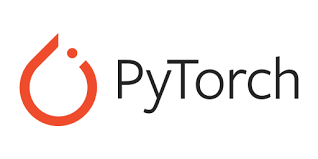

# Deep Neural Network Implementation Using PyTorch

## Installation

To install PyTorch, you can use `pip` or `conda`.

In [1]:
!pip install torch torchvision torchsummary

Also, you can find the comprehensive tutorial on get started in the [official page](https://pytorch.org/get-started/locally/).


## Import
Import the necessary libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### Setting up the GPU (Optional)

If you have access to a GPU, PyTorch can leverage its power to accelerate computations. To utilize the GPU, ensure that you have the appropriate NVIDIA drivers installed. You can then enable GPU support in PyTorch by adding the following code:

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Dataset Preparation

We will focus on the MNIST dataset as an illustrative example. By following these steps, you will gain an in-depth understanding of dataset preparation in the context of deep learning.



### Data Loading

PyTorch's `torchvision` module provides a range of functions for automatically downloading and loading popular datasets, including MNIST, CIFAR and etc. The MNIST dataset comprises grayscale images of handwritten digits, with each image labeled from 0 to 9.

In [4]:
# load the MNIST dataset using PyTorch

import torchvision.datasets as datasets

# Define the root directory for dataset storage
data_root = "./data"

# Download and load the MNIST training set
train_set = datasets.MNIST(root=data_root, train=True, download=True)

# Download and load the MNIST test set
test_set = datasets.MNIST(root=data_root, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 93748362.38it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23831535.28it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26639952.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20888737.68it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



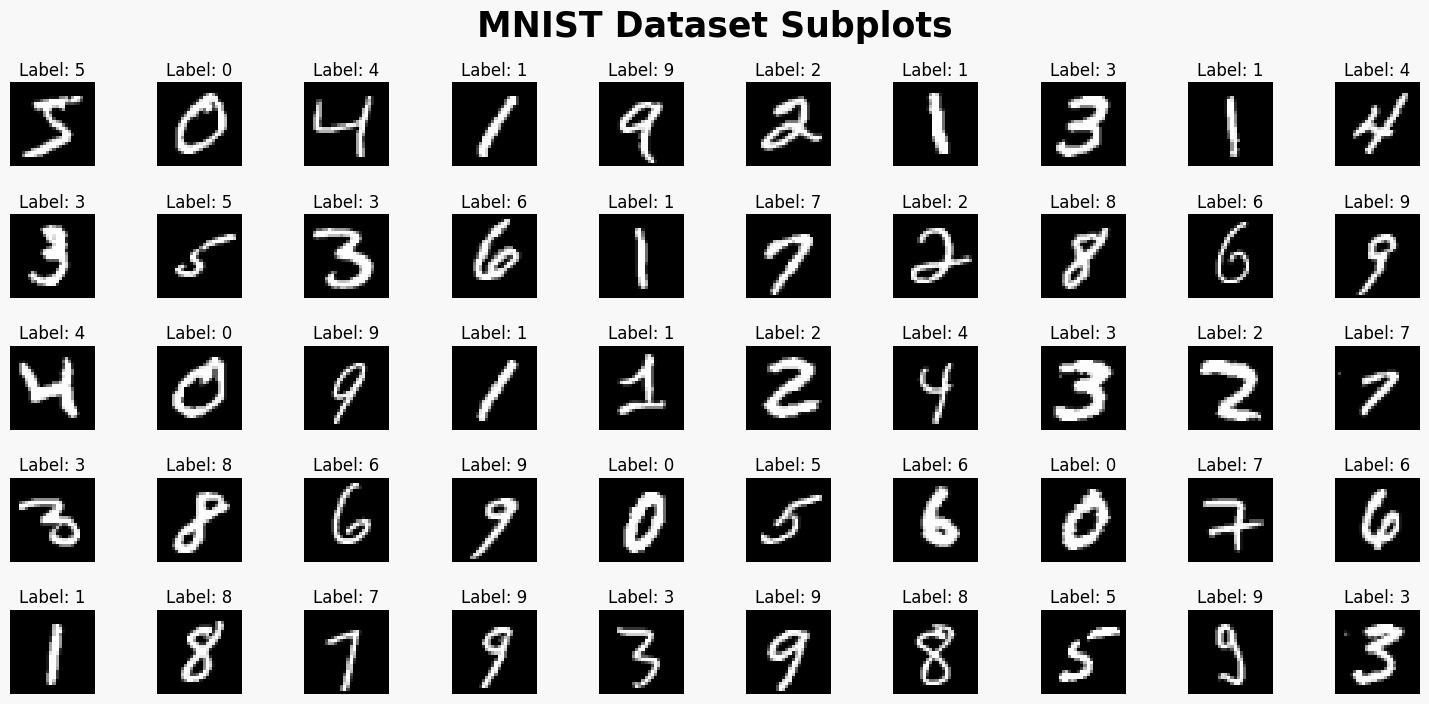

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows and columns for the subplots
num_rows = 5
num_cols = 10

# Calculate the total number of subplots
num_subplots = num_rows * num_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7.5))

# Iterate over the MNIST dataset and plot the images
for i in range(num_subplots):
    image, label = train_set[i]

    # Convert the image PIL Image object to a NumPy array
    image = np.array(image)

    # Get the subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Plot the image in the corresponding subplot
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f'Label: {label}', fontsize=12, pad=5)
    axes[row_idx, col_idx].axis('off')

    # Add a border around each subplot
    axes[row_idx, col_idx].spines['top'].set_visible(True)
    axes[row_idx, col_idx].spines['bottom'].set_visible(True)
    axes[row_idx, col_idx].spines['left'].set_visible(True)
    axes[row_idx, col_idx].spines['right'].set_visible(True)
    axes[row_idx, col_idx].spines['top'].set_color('gray')
    axes[row_idx, col_idx].spines['bottom'].set_color('gray')
    axes[row_idx, col_idx].spines['left'].set_color('gray')
    axes[row_idx, col_idx].spines['right'].set_color('gray')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Set the overall title and styling
fig.suptitle('MNIST Dataset Subplots', fontsize=25, fontweight='bold', y=0.95)
plt.tight_layout(pad=2)

# Add a background color to the figure
fig.patch.set_facecolor('#F8F8F8')

# Display the subplots
plt.show()


## Data Preprocessing


In [7]:
import torchvision.transforms as transforms

We use the `ToTensor` transformation to convert the PIL images in the dataset to tensors, enabling efficient processing within the deep neural network. Subsequently, the `Normalize` transformation scales the pixel values by subtracting the mean (0.5) and dividing by the standard deviation (0.5), resulting in a range of [-1, 1].

In [8]:
# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),               # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize the pixel values to the range [-1, 1]
])

# Apply the transformation pipeline to the training set
train_set.transform = transform

# Apply the transformation pipeline to the test set
test_set.transform = transform

### Train-Validation-Test Split
We can split the MNIST dataset into training, validation, and test sets using `torch.utils.data.random_split`

In [9]:
from torch.utils.data import random_split

# Define the proportions for the split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Compute the sizes of each split
train_size = int(len(train_set) * train_ratio)
val_size = int(len(train_set) * val_ratio)
test_size = len(train_set) - train_size - val_size

# Perform the random split
train_set, val_set, test_set = random_split(train_set, [train_size, val_size, test_size])

By splitting the dataset in this manner, we ensure that the model is trained on a sufficiently large training set, validated on a smaller validation set to monitor performance, and tested on an independent test set to evaluate generalization.


## Model Architecture Design

Designing the architecture of your deep neural network involves selecting the number of layers, their sizes, and the activation functions. Additionally, you need to choose a suitable loss function and optimizer for training the model. Proper selection of hyperparameters is crucial for model performance.


## Building the Deep Neural Network Model

### Defining the Model Class

In the process of building a deep learning model, defining the model class is a fundamental step. This involves creating a class that inherits from the `nn.Module` base class provided by PyTorch. The model class serves as a blueprint for the architecture of the neural network and encapsulates the layers and the forward propagation logic.

To define the model class, you need to perform the following steps:

1. Create a class that inherits from `nn.Module`, such as `NeuralNetwork(nn.Module)`.
   - By inheriting from `nn.Module`, you can leverage the functionalities and features provided by PyTorch for model construction and training.

2. Define the architecture of the neural network within the `__init__` method.
   - In the `__init__` method, you specify the layers and their configurations. This is where you instantiate and define the individual layers of your network.
   - For example, you can use `nn.Linear` to create fully connected layers, specifying the input size, output size, and other relevant parameters.

3. Implement the forward propagation logic in the `forward` method.
   - The `forward` method defines how the input flows through the network and produces the output.
   - You apply the necessary activation functions and combine the layers to form the desired network architecture.
   - Ensure that the forward pass is defined in a sequential manner, specifying the sequence of operations that transform the input into the output.

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.batchnorm2 = nn.BatchNorm1d(output_size)

        # Weight initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.batchnorm2(x)
        return x


### Initializing the Model


Key steps include defining the input size, hidden size, and output size, which dictate the dimensions of the neural network. To leverage hardware acceleration, the code automatically allocates the model to a GPU if available, utilizing the `torch.cuda.is_available()` function. The `NeuralNetwork` model is then instantiated with the specified dimensions, followed by moving the model to the GPU using the `.to(device)` method.



The `summary` function from `torchsummary` is utilized to generate a concise report on the model's architecture. This summary aids researchers and practitioners in understanding the model's complexity, facilitating informed decision-making regarding model design and optimization.

In [13]:
from torchsummary import summary

input_size = 784  # Number of input features
hidden_size = 128  # Number of hidden units
output_size = 10  # Number of output classes


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetwork(input_size, hidden_size, output_size).to(device)# Create an instance of the NeuralNetwork model

summary(model, (input_size,))  # Print the summary of the model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
       BatchNorm1d-2                  [-1, 128]             256
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
       BatchNorm1d-6                   [-1, 10]              20
Total params: 102,046
Trainable params: 102,046
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


## Training the Model

To train the deep learning model, we need to define the optimization algorithm, loss function, and training parameters.

We will iterate over the training dataset for a specified number of epochs, which determines the number of times the model will be trained on the entire dataset. In each epoch, we perform the following steps:

1. Set the model to the training mode using `model.train()`.
2. Initialize the running loss variable to keep track of the loss during the epoch.
3. Iterate over the batches of data from the training loader.
4. Move the input data and labels to the appropriate device (e.g., GPU) for faster computation.
5. Zero the gradients to avoid accumulation from previous iterations.
6. Perform a forward pass through the model to obtain the predicted outputs.
7. Compute the loss between the predicted outputs and the true labels.
8. Perform a backward pass and update the model's parameters using gradient descent.
9. Update the running loss with the current batch loss.
10. Compute the average training loss for the epoch by dividing the running loss by the total number of training samples.
11. Optionally, print the training progress for each epoch.

After completing the specified number of epochs, the model will have learned the underlying patterns in the training data. This process of training allows the model to adjust its parameters to minimize the loss and improve its predictive capabilities.

Note: The specific details of the optimizer, loss function, and training parameters may vary depending on the task and the specific requirements of your deep learning model.

### Setting up Training Parameters

Before training the model, we need to set up various training parameters. These parameters include the loss function, optimizer, number of epochs, and batch size.

- **Loss Function**: The loss function measures the discrepancy between the predicted outputs and the true labels. In this case, we will use the CrossEntropyLoss function, which is commonly used for multi-class classification problems.

- **Optimizer**: The optimizer determines how the model's parameters are updated during training. We will use the Adam optimizer, which is an extension of stochastic gradient descent (SGD). It adapts the learning rate dynamically for each parameter, leading to faster convergence and improved performance.

- **Number of Epochs**: The number of epochs defines how many times the model will be trained on the entire dataset. Each epoch consists of a forward and backward pass through the network, updating the parameters based on the calculated gradients. In this example, we will train the model for 10 epochs.

- **Batch Size**: The batch size determines the number of samples that are processed together before the model's parameters are updated. It affects the trade-off between computational efficiency and the quality of parameter updates. A larger batch size can lead to faster training, but it may also require more memory. In this case, we will use a batch size of 32.

By appropriately setting these training parameters, we can ensure effective and efficient training of our deep learning model.






In [18]:
# Defining the Loss Function
criterion = nn.CrossEntropyLoss()

# Selecting the Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the Number of Epochs
num_epochs = 10

# Define the Batch Size
batch_size = 32

The next step in training the model is to create data loaders for the training and validation datasets. Data loaders help in efficiently loading and preprocessing the data during training.

- **train_loader**: The train_loader is created using the `torch.utils.data.DataLoader` class. It takes the training dataset (`train_set`) as input along with the batch size (`batch_size`) and the `shuffle` parameter set to `True`. The shuffle parameter ensures that the training samples are randomly shuffled before each epoch, which helps in avoiding any bias that could arise from the ordering of the data.

- **validation_loader**: The validation_loader is created in a similar manner to the train_loader. It uses the validation dataset (`val_set`) as input along with the batch size (`batch_size`). The shuffle parameter is set to `False` to maintain the order of the validation samples, as shuffling is not required during the validation phase.

These data loaders will be used during the training process to efficiently feed the batches of data to the model for training and evaluation.

In [19]:
# Create the train_loader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

# Create the validation_loader
validation_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)


### Training Loop

The training loop is where the model is trained on the training dataset and evaluated on the validation dataset for each epoch.

- **train_losses**: This list is initialized to store the training loss for each epoch. It will be used to track the progress of the training process.

- **val_losses**: This list is initialized to store the validation loss for each epoch. It will be used to monitor the performance of the model on the validation dataset.

- **accuracies**: This list is initialized to store the accuracy for each epoch. It will help evaluate how well the model is performing on the validation dataset.

The training loop consists of two nested loops: the outer loop iterates over each epoch, and the inner loop iterates over the batches of data in the train_loader.

Inside the inner loop:
- The inputs and labels are moved to the GPU if available using `inputs.to(device)` and `labels.to(device)`.

- The gradients are zeroed using `optimizer.zero_grad()` to avoid accumulating gradients from previous iterations.

- The forward pass is performed by passing the inputs through the model using `outputs = model(inputs)`.

- The loss is computed by comparing the model's outputs with the ground truth labels using `loss = criterion(outputs, labels)`.

- The backward pass is performed by calling `loss.backward()`, which computes the gradients of the loss with respect to the model's parameters.

- The optimizer's `step()` function is called to update the model's parameters based on the computed gradients.

- The running loss is updated by multiplying the loss with the batch size (`inputs.size(0)`) and adding it to `running_loss`.

After each epoch:
- The average training loss for the epoch is computed by dividing the running loss by the total number of training samples.

- The model is switched to evaluation mode using `model.eval()`.

- Validation is performed by iterating over the validation_loader. The validation loss and accuracy are computed similar to the training loop.

- The average validation loss and accuracy are computed by dividing the total validation loss and correct predictions by the number of validation samples.

- The training progress, including the epoch number, training loss, validation loss, and accuracy, is printed for monitoring.

The training loop completes after all epochs have been processed, and the final message "Training complete" is printed.

In [20]:
# Initialize empty lists to store metrics
train_losses = []
val_losses = []
accuracies = []

# Proceed with the training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)  # Move inputs to the GPU if available
        labels = labels.to(device)  # Move labels to the GPU if available

        optimizer.zero_grad()  # Zero the gradients

        outputs = model(inputs)  # Forward pass

        loss = criterion(outputs, labels)  # Compute the loss

        loss.backward()  # Backward pass and optimization
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # Update running loss

    train_loss = running_loss / len(train_set)  # Compute average training loss for the epoch

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}")  # Print training progress

    # Compute average training loss for the epoch
    train_loss = running_loss / len(train_set)
    train_losses.append(train_loss)

    # Perform validation
    model.eval()
    with torch.no_grad():
        # Initialize validation loss and accuracy variables
        validation_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in validation_loader:
            inputs = inputs.to(device)  # Move inputs to the GPU if available
            labels = labels.to(device)  # Move labels to the GPU if available

            outputs = model(inputs)  # Forward pass

            validation_loss += criterion(outputs, labels).item() * inputs.size(0)  # Compute validation loss

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute average validation loss and accuracy
        val_loss = validation_loss / len(val_set)
        val_losses.append(val_loss)
        accuracy = correct / total * 100
        accuracies.append(accuracy)

        # Print training progress
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete")


Epoch 1/10, Training Loss: 0.3673658960887364
Epoch 1/10, Train Loss: 0.3674, Val Loss: 0.1725, Accuracy: 96.02%
Epoch 2/10, Training Loss: 0.32074411276408604
Epoch 2/10, Train Loss: 0.3207, Val Loss: 0.1643, Accuracy: 95.98%
Epoch 3/10, Training Loss: 0.2885793504204069
Epoch 3/10, Train Loss: 0.2886, Val Loss: 0.1385, Accuracy: 96.43%
Epoch 4/10, Training Loss: 0.26486541454281126
Epoch 4/10, Train Loss: 0.2649, Val Loss: 0.1290, Accuracy: 96.68%
Epoch 5/10, Training Loss: 0.2510575955793971
Epoch 5/10, Train Loss: 0.2511, Val Loss: 0.1246, Accuracy: 96.89%
Epoch 6/10, Training Loss: 0.23510122887577328
Epoch 6/10, Train Loss: 0.2351, Val Loss: 0.1123, Accuracy: 97.02%
Epoch 7/10, Training Loss: 0.22847037938946768
Epoch 7/10, Train Loss: 0.2285, Val Loss: 0.1097, Accuracy: 97.16%
Epoch 8/10, Training Loss: 0.21747894473870596
Epoch 8/10, Train Loss: 0.2175, Val Loss: 0.1063, Accuracy: 97.22%
Epoch 9/10, Training Loss: 0.2100531817362422
Epoch 9/10, Train Loss: 0.2101, Val Loss: 0.1

After training the model, it is important to monitor the training progress and assess the model's performance. One way to visualize the training progress is by plotting the training and validation losses over the epochs.

- The `plt.plot` function is used to plot the training and validation losses. The `train_losses` and `val_losses` lists contain the calculated losses for each epoch during training.

- The x-axis of the plot represents the epochs, which indicates the number of times the entire training dataset has been passed through the model during training.

- The y-axis represents the loss value, which quantifies the deviation of the model's predicted outputs from the true labels. Lower loss values indicate better performance.

- The `plt.xlabel` function sets the label for the x-axis, which represents the epochs.

- The `plt.ylabel` function sets the label for the y-axis, which represents the loss value.

- The `plt.legend` function displays a legend on the plot, indicating which line corresponds to the training loss and which line corresponds to the validation loss.

- Finally, the `plt.show` function displays the plot.

By observing the training progress plot, you can gain insights into how the model is learning and whether it is overfitting or underfitting the data. It allows you to make informed decisions regarding model adjustments and hyperparameter tuning to optimize the model's performance.

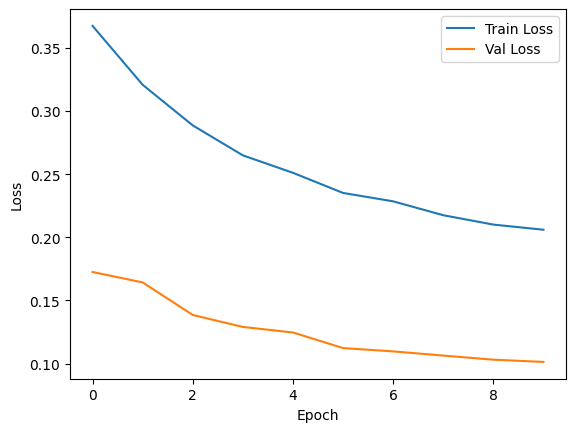

In [21]:
# Plot training progress
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

After training the model, it is important to evaluate its performance on unseen data to assess its generalization capabilities. The testing process involves feeding the test dataset into the trained model and calculating the test loss and accuracy.

- The model is set to evaluation mode using `model.eval()`. This ensures that any layers or operations that behave differently during training, such as dropout or batch normalization, are properly adjusted for evaluation.

- The test dataset is loaded into a `test_loader` using `torch.utils.data.DataLoader`. This loader enables efficient batch processing of the test data.

- The test loss is calculated by iterating over the test loader and performing a forward pass through the model. The loss is computed using the same criterion (e.g., cross-entropy loss) used during training. The test loss is accumulated and multiplied by the batch size to obtain the overall test loss.

- During the forward pass, the model predicts the class labels for the test inputs. The predicted labels are obtained by selecting the class with the highest probability from the output probabilities.

- The total number of test samples and the number of correct predictions are updated for each batch.

- The average test loss is computed by dividing the accumulated test loss by the total number of test samples.

- The accuracy is calculated by dividing the number of correct predictions by the total number of test samples and multiplying by 100 to obtain a percentage.

- Finally, the test loss and accuracy are printed to assess the model's performance on the unseen test data.

By evaluating the model on the test dataset, you can obtain insights into how well the model generalizes to new, unseen samples. The test loss provides an indication of the model's overall performance, while the accuracy gives the percentage of correctly predicted labels. These metrics help assess the model's effectiveness and guide further improvements if necessary.

In [22]:
# Testing the Model
model.eval()  # Set the model to evaluation mode

test_loss = 0.0
correct = 0
total = 0

# Create the test_loader
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Disable gradient computation for efficiency
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)  # Move inputs to the GPU if available
        labels = labels.to(device)  # Move labels to the GPU if available

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        # Convert output probabilities to predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute average test loss and accuracy
average_loss = test_loss / len(test_set)
accuracy = (correct / total) * 100

print(f"Test Loss: {average_loss:.4f}")
print(f"Accuracy: {accuracy:.2f}%")


Test Loss: 0.1012
Accuracy: 97.13%


During model evaluation, it can be insightful to visualize the predictions made by the model on individual images. This provides a qualitative assessment of the model's performance.

- The model is set to evaluation mode using `model.eval()`. This ensures that any layers or operations that behave differently during training, such as dropout or batch normalization, are properly adjusted for evaluation.

- A random sample from the test dataset is selected using the `random.randint()` function. This allows us to visualize a different image and its corresponding label each time.

- The image tensor and its corresponding label are retrieved from the test dataset.

- The image tensor is moved to the same device as the model using `image.to(device)`.

- The model is also moved to the same device as the image using `model.to(device)`.

- A forward pass is performed on the image tensor to obtain the predicted label. The output of the model is obtained by passing the image tensor through the model using `model(image.unsqueeze(0))`. The predicted label is then obtained by selecting the class with the highest probability from the output using `torch.max(output.data, 1)`.

- The image tensor is converted to a numpy array using `image.squeeze().cpu().numpy()`. This allows us to easily display the image using `plt.imshow()`.

- Finally, the image along with the predicted label and true label is displayed using `plt.imshow()` and `plt.title()`. The axis is turned off using `plt.axis('off')` to remove any axis labels or tick marks.

By visualizing the predicted label alongside the image, you can gain an understanding of how well the model performs on individual samples. This allows you to assess the model's ability to correctly classify different instances and identify any potential areas for improvement.

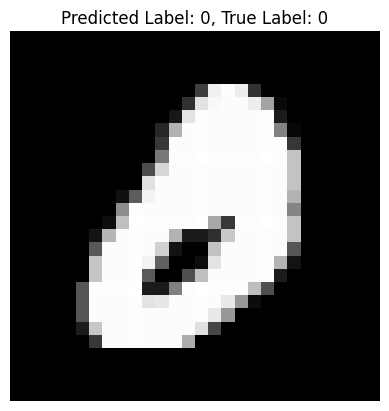

In [30]:
import random
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Select a random sample from the test dataset
index = random.randint(0, len(test_set) - 1)
image, label = test_set[index]

# Move the image tensor to the same device as the model
image = image.to(device)

# Move the model to the same device as the image
model = model.to(device)

# Forward pass to obtain the predicted label
with torch.no_grad():
    output = model(image.unsqueeze(0))
    _, predicted_label = torch.max(output.data, 1)

# Convert the image tensor to a numpy array
image = image.squeeze().cpu().numpy()

# Display the image and predicted label
plt.imshow(image, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, True Label: {label}')
plt.axis('off')
plt.show()


In this section, we will compute the confusion matrix and classification report to assess the model's performance on the test dataset.

- **Confusion Matrix**: The confusion matrix provides a tabular representation of the model's predictions versus the true labels. It shows the number of samples that are correctly classified (true positives and true negatives) and the number of samples that are misclassified (false positives and false negatives). The confusion matrix provides insights into the model's performance for each class and helps in identifying any patterns or biases in the predictions.

- **Classification Report**: The classification report presents a comprehensive summary of various evaluation metrics such as precision, recall, F1 score, and support for each class. Precision represents the accuracy of positive predictions, recall measures the ability to correctly identify positive samples, and the F1 score is the harmonic mean of precision and recall. The support indicates the number of samples in each class. The classification report provides a detailed understanding of the model's performance for each class and overall.

To compute these evaluation metrics, we set the model to evaluation mode using `model.eval()`. Then, we iterate over the test dataset using a data loader (`test_loader`). For each batch of inputs and labels, we move them to the appropriate device (CPU or GPU) for computation. We perform a forward pass through the model to obtain the predicted class labels. These predicted labels and true labels are then accumulated in the `predictions` and `true_labels` lists, respectively.

Finally, we use the `confusion_matrix` and `classification_report` functions from the `sklearn.metrics` module to compute the confusion matrix and classification report based on the accumulated predictions and true labels. The results are printed to provide a detailed assessment of the model's performance on the test dataset.

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predictions for the test dataset
model.eval()  # Set the model to evaluation mode
predictions = []
true_labels = []

# Disable gradient computation for efficiency
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Convert output probabilities to predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Append the predicted and true labels
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Compute the confusion matrix and classification report
cm = confusion_matrix(true_labels, predictions)
report = classification_report(true_labels, predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[ 877    0    2    1    0    0    4    0    5    0]
 [   0 1016    6    2    0    1    0    1    2    2]
 [   2    6  856    2    3    0    0    4    9    2]
 [   0    1    5  887    1    8    0    7    4    4]
 [   0    1    2    0  888    0    0    1    0   20]
 [   0    1    2   11    5  792    7    1    6    3]
 [   1    1    0    0    0    7  877    0    6    0]
 [   0    7    6    2    4    0    0  878    3    8]
 [   0    3    0    5    2    6    5    0  825    7]
 [   2    0    0   11   16    2    0    9    1  846]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.98      0.99      0.98      1030
           2       0.97      0.97      0.97       884
           3       0.96      0.97      0.97       917
           4       0.97      0.97      0.97       912
           5       0.97      0.96      0.96       828
           6       0.98      0.98      0.98     

After computing the confusion matrix, we can visualize it using a heatmap to gain a better understanding of the model's performance. In this section, we use the `seaborn` and `matplotlib` libraries to create and customize a heatmap of the confusion matrix.

- **Confusion Matrix Visualization**: The confusion matrix provides valuable insights into the model's predictions and the actual labels. By visualizing the confusion matrix, we can easily identify patterns, imbalances, and misclassifications in the predictions. The heatmap representation allows us to observe the distribution of correct and incorrect predictions across different classes. The diagonal elements represent the correctly classified samples, while the off-diagonal elements indicate the misclassifications.

To visualize the confusion matrix, we first create a figure and axes using `plt.subplots(figsize=(10, 8))` to define the size of the plot. We then use `sns.heatmap` to create a heatmap of the confusion matrix. The `annot=True` argument displays the actual values in the heatmap cells, the `cmap='Blues'` argument sets the color scheme, and `fmt='d'` formats the values as integers. By setting `cbar=False`, we remove the color bar from the plot.

Next, we customize the axis labels and title using `ax.set_xlabel()`, `ax.set_ylabel()`, and `ax.set_title()`. To improve the readability of the plot, we customize the tick labels using `ax.set_xticklabels()` and `ax.set_yticklabels()`. Additionally, we rotate the tick labels using `plt.xticks(rotation=45)` and `plt.yticks(rotation=0)` for better visibility.

Finally, we use `plt.show()` to display the plot and visualize the confusion matrix. This visualization provides a clear representation of the model's performance in terms of correctly classified and misclassified samples across different classes.


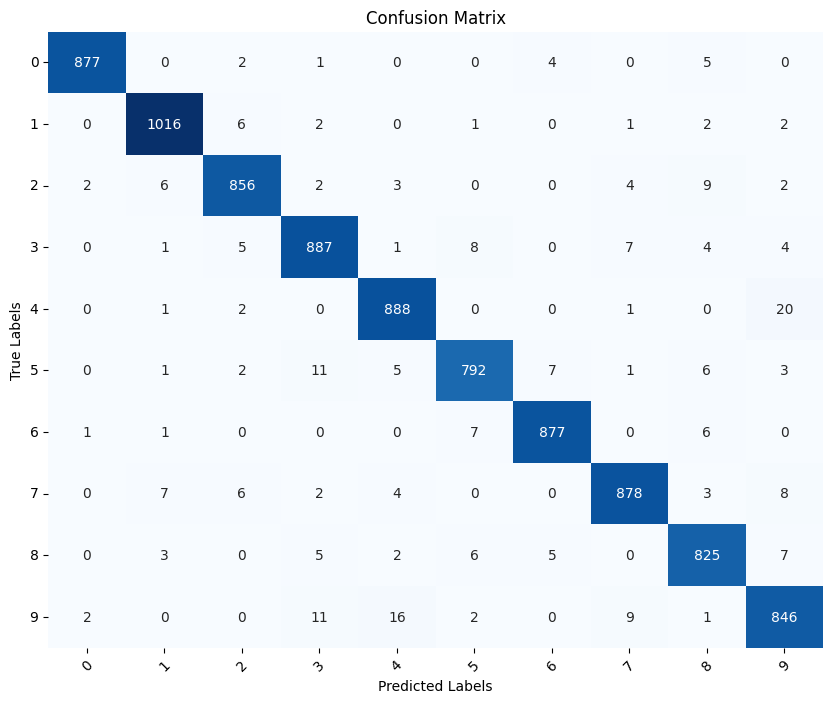

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Customize the tick labels
tick_labels = range(len(cm))
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


## Saving the Model

After training and evaluating the model, it is often beneficial to save the trained model for future use. This allows you to load the model later and make predictions without having to retrain it. Here is a brief explanation of the code for saving the model:

- The `torch.save()` function is used to save the state dictionary of the model to a file. The state dictionary contains all the learnable parameters of the model, such as weights and biases.

- `model.state_dict()` returns a dictionary containing the current state of the model. It includes the parameters and their corresponding values.

- The first argument of `torch.save()` is the state dictionary that we want to save, which is obtained by calling `model.state_dict()`.

- The second argument is the file path and name where we want to save the model. In this example, the model is saved as 'model.pth', but you can choose any desired name and file extension.

By saving the model, you can easily load it later using `torch.load()` and reuse it for making predictions or further training. It is important to note that the saved model does not include the model architecture, only the learned parameters. Therefore, when loading the model, you need to define the model architecture and load the saved parameters into it.

In [25]:
torch.save(model.state_dict(), 'model.pth')

## Load the Model


After saving the trained model, you can load it at a later time to make predictions or continue training. Here is a brief explanation of the code for loading the model:

- First, you need to create an instance of the model by calling the model class with the appropriate architecture. In this example, we use the `NeuralNetwork` class with the specified `input_size`, `hidden_size`, and `output_size` parameters.

- Then, you can use the `load_state_dict()` method to load the saved state dictionary into the model. The `torch.load()` function is used to load the state dictionary from the saved file 'model.pth'.

- After loading the state dictionary, you need to set the model to evaluation mode by calling `model.eval()`. This ensures that the model is in the correct mode for making predictions.

By loading the model, you can easily reuse it for inference or continue training from where you left off. It is important to note that when loading the model, you need to define the model architecture first and then load the saved parameters into it.

In [31]:
model = NeuralNetwork(input_size, hidden_size, output_size)
model.load_state_dict(torch.load('model.pth'))
model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)